# Data pre-processing

To load a CSV file and look at the general information about it, you can use the Pandas library in Python. Here are the steps to do this:

- Import the Pandas library.
- Load the CSV file into a Pandas DataFrame.
- Examine the general information about the DataFrame.

The function pd.read_csv(file_path) loads the CSV file into a Pandas DataFrame named df. The df.info() method returns general information about the dataset, including the number of non-null entries for each column, the data types of the columns, and memory usage.

In [46]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('indian_catfood_dataset.csv')

# Show general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      228 non-null    int64  
 1   products        228 non-null    object 
 2   company         228 non-null    object 
 3   price           199 non-null    float64
 4   weight          228 non-null    float64
 5   star_rating     193 non-null    float64
 6   total_comments  193 non-null    float64
 7   flavours        228 non-null    object 
 8   price_per_100g  199 non-null    float64
 9   per_kg_sell     173 non-null    float64
 10  adult           228 non-null    float64
 11  chicken         228 non-null    float64
 12  wet             228 non-null    float64
 13  from_oceon      228 non-null    float64
 14  fish            228 non-null    float64
 15  tuna            228 non-null    float64
 16  salmon          228 non-null    float64
 17  mackerel        228 non-null    flo

The dataset is structured with 228 entries across 28 columns, representing different aspects of cat food products in India. Here are some key details:

    Unnamed: 0: An index or identifier column.
    products: Names or descriptions of the cat food products.
    company: The company or brand of the cat food.
    price: The price of the product (some entries are missing).
    weight: Weight of the product in presumably kilograms.
    star_rating: Average star rating of the product (some entries are missing).
    total_comments: Number of comments or reviews the product has received (some entries are missing).
    flavours: Flavors or ingredients of the cat food, stored as a list in string format.
    price_per_100g: Price per 100 grams of the product (calculated for some entries).
    per_kg_sell: Some numerical data, possibly representing sales figures or revenue per kilogram.
    adult: A binary or categorical feature indicating if the product is suitable for adult cats.
    Features from chicken to vegan (columns 11 to 27): These seem to be binary (0/1) features indicating the presence of specific ingredients or characteristics like whether the food is wet, contains fish, tuna, salmon, etc., or is vegan.

It appears to be a comprehensive dataset detailing various attributes of cat food products, including their pricing, ratings, sales, and composition. The data also includes multiple binary columns indicating the presence or absence of certain ingredients or characteristics, which can be useful for analysis or recommendation systems. Some columns have missing values that might require handling depending on the intended analysis or usage of this data.

The head() method gives you an overview of the loaded dataset, including the first few rows and column names.

In [47]:
# Show the first rows
df.head(3)

,Unnamed: 0,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
0,0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"['Dry', 'Adult', 'Mackerel']",15.750000,1304887.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"['Dry', 'Adult', 'Fish', 'Ocean']",12.557143,1473831.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"['Dry', 'Adult', 'Fish', 'Ocean']",27.142857,2186628.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We use the nunique() method to calculate the number of unique values in the 'products' column of the DataFrame.
The method returns the number of unique values in the specified column.

As we can see, only 218 of the 228 products are unique.

In [48]:
df['products'].nunique()

218

The df.duplicated() method checks for duplicate rows in the DataFrame and returns a Boolean series where True indicates a duplicate row and False indicates a unique row.

We used this method to filter for duplicate products and found 10 duplicate products.

In [49]:
df.products[df.products.duplicated()]

3            Purepet Mackerel Adult Dry Cat Food, 1.2 kg
13     Drools Adult(+1 year) Dry Cat Food, Ocean Fish...
17     Meat Up Adult Dry Cat Food, Ocean Fish - 1.2kg...
97     Schesir Chicken fillets with Ham Multipack Can...
132    Me-O OEM Systems Cat Food, Gourmet Flavor, 1.1 Kg
135     Whiskas Junior Cat Food - Ocean Fish, 450g Pouch
162    Applaws Cat Wet Food 70g Tuna Fillet with Paci...
163            OEM SYSTEMS ME-O Cat food SEAFOOD 1.2 KGS
164    Whiskas Adult (+1 Year) Dry Cat Food, Mackerel...
170    Nurture Pro Longevity Grain Free Wet Cat Food ...
Name: products, dtype: object

Here is an example of duplicated products.

In [50]:
df[df.products=='Purepet Mackerel Adult Dry Cat Food, 1.2 kg']

,Unnamed: 0,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
0,0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"['Dry', 'Adult', 'Mackerel']",15.75,1304887.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"['Dry', 'Adult', 'Mackerel']",15.75,1304887.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before processing duplicate rows, we'll remove duplicate columns: the 'Unnamed: 0' because it duplicates the 'index', 'products' and 'flavours' because they duplicate information from other columns; and 'price_per_100g' and 'per_kg_sell' because they are calculated based on other columns.

We use the drop() method to drop a particular column from the DataFrame. If inplace=True, the DataFrame is modified in place, meaning that the change is applied directly to the original DataFrame. If inplace=False (or omitted), drop() returns a new DataFrame with the specified column(s) dropped, without modifying the original DataFrame.

After dropping the column, we check how many columns remain.

In [51]:
# Drop columns
df.drop(['Unnamed: 0','products','flavours','price_per_100g','per_kg_sell'],\
        axis='columns', inplace=True)
len(df.columns)

23

Now we use the duplicated() method to check for duplicate rows in the DataFrame. As we saw before, there are 10 duplicate rows.

In [52]:
len(df[df.duplicated()])

10

To remove duplicate rows from a DataFrame in Python, you can use the drop_duplicates() method provided by libraries such as pandas. The method returns a new DataFrame with the duplicate rows removed. If you want to modify the original DataFrame in place, you can use inplace=True as an argument to the drop_duplicates() method.

After dropping the duplicates, we reset the index and look at the shape of the DataFrame. Now our table has 218 rows (product descriptions) and 23 columns (features).

In [53]:
# Step 1: Delete duplicated rows
df.drop_duplicates(inplace=True)

# Step 2: Optionally, you can reset the index if needed
df.reset_index(drop=True, inplace=True)

# Step 3: Check the result
df.shape

(218, 23)

We use the nunique() method to calculate the number of unique values in the Company column of the DataFrame.

As we can see, our database contains products from 41 companies.

In [54]:
df['company'].nunique()

41

We use the value_counts() method to count the occurrences of each unique value in the 'company' column. We then iterate over the unique values and print each value along with its corresponding count.

As we can see, only 7 of the 41 companies had products that were bought at least 10 times.

In [55]:
df['company'].value_counts()

whiskas         51
me-o            23
farmina         19
royal           15
meat            11
purepet         10
sheba           10
purina           9
schesir          7
drools           5
prodiet,         5
kitty            4
iams             4
heads            3
generic          3
matisse          3
kennel           3
let's            3
wysong           2
choudhary        2
wag              2
dynamicsales     2
pet              2
applaws          2
oem              2
halo             1
fekrix           1
wiggles          1
fins             1
calibra          1
meo              1
purevita         1
lara             1
nurture          1
kit              1
barkbutler       1
arden            1
maxi             1
kittibles        1
puirna           1
sk               1
Name: company, dtype: int64

These brands (whiskas, me-o, farmina, royal, meat, purepet, sheba) sold 139 out of 218 products.

In [56]:
51+23+19+15+11+10+10

139

The df.describe() method calculates and returns basic statistics for the numeric columns in the DataFrame.

When you run this code, it prints a summary of basic statistics for the numeric columns in your CSV dataset. This includes information such as the number of non-null values, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile and maximum for each numeric column.

In [57]:
# Describe the data
df.describe()

,price,weight,star_rating,total_comments,adult,chicken,wet,from_oceon,fish,tuna,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
count,190.000000,218.000000,183.000000,183.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1168.126316,2.128202,4.314754,853.322404,0.672018,0.288991,0.635321,0.628440,0.284404,0.270642,...,0.004587,0.032110,0.114679,0.142202,0.155963,0.032110,0.004587,0.013761,0.004587,0.100917
std,1300.285665,2.351883,0.432919,1987.326627,0.414592,0.454337,0.411572,0.484334,0.452168,0.445314,...,0.067729,0.176698,0.319367,0.350061,0.363656,0.176698,0.067729,0.116767,0.067729,0.301913
min,40.000000,0.005000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.250000,0.800000,4.200000,16.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,612.500000,1.200000,4.400000,132.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1498.500000,2.700000,4.500000,533.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6550.000000,14.000000,5.000000,12982.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here we see that we have only 190 non-null prices and 183 non-null ratings out of 218 entries in our dataframe. 

Dealing with missing data is a crucial step in preparing your dataset for analysis or modeling. The best method often depends on the nature of the data, the amount of missing data, and the intended analysis or model. Here are several strategies:

1. Deletion:
- Listwise Deletion: Remove entire rows where any data is missing. This is simple but can significantly reduce the dataset size, potentially biasing the results.

- Pairwise Deletion: Used primarily in statistical procedures where only the available data are used for calculation. It maximizes data use but can introduce bias and complexity.

2. Imputation:
- Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the column. It's simple but can reduce variance and may not be suitable for all data types.

- Predictive Models: Use algorithms like linear regression, decision trees, or k-Nearest Neighbors to predict and impute missing values based on other features.

- Hot-Deck Imputation: Replace a missing value with an observed response from a similar unit.

- Multiple Imputation: Creates multiple imputations (predictions) for the missing values and averages the results; more sophisticated and considers the uncertainty in the imputations.

3. Using Algorithms that Support Missing Values: Some algorithms can handle missing values internally. For example, decision trees and random forests can split nodes on missing values in ways that are meaningful for the prediction.

4. Last Observation Carried Forward (LOCF) or Next Observation Carried Backward (NOCB): This is often used in time-series data where the last or next observed value is carried forward or backward.

5. Creating Indicator Variables: For some analyses, especially when the missingness itself is informative, you might create a new binary variable indicating the presence or absence of data for a particular observation and column.

6. Understanding the Mechanism: Analyzing why the data is missing can be important. If data are Missing Completely at Random (MCAR), the missingness has no patterns and is unrelated to the data. If data are Missing at Random (MAR), the missingness is related to observed data but not the missing data. If data are Missing Not at Random (MNAR), the missingness is related to the value of the missing data itself. Strategies might vary considerably based on these conditions.

Recommendations:

1. Understand the Data: Before choosing a method, understand the data, the reason for the missingness, and the impact of missing data on the analysis.
2. Simple Imputation for Starters: If the dataset is large and the missing data is minimal, simple imputation methods (mean, median, mode) might be sufficient.
3. Use Advanced Techniques for Critical Analysis: If the analysis is sensitive or the proportion of missing data is significant, consider more sophisticated methods like multiple imputation or modeling.
4. Avoid Bias: Be wary of methods that might introduce bias or alter the distribution of the data significantly.
5. Validate the Approach: Whatever method is chosen, it's vital to validate the approach by checking how it impacts the results of the analysis or the performance of the model.

Each method has its pros and cons, and the choice often depends on the specific circumstances and the nature of the missing data. It's also common to try multiple approaches and compare results to decide on the best method for the specific context.

Let's take the easiest one - drop the missing values. But remember that this is not the best idea - you can lose a lot of valuable things by cleaning up the data in such a crude way. So we need to check how many records are left in the table after dropping the missing data.

In [58]:
# Drop rows with missing values
df.dropna(inplace=True)
len(df)

164

Here we remove binary variables with low variance. 

In [59]:
# Calculate the standard deviation of each column
column_std = df.std(numeric_only=True)

# Define the threshold for standard deviation
threshold = 0.2

# Drop columns with a low standard deviation
columns_to_drop = column_std[column_std <= threshold].index
df = df.drop(columns_to_drop, axis=1)

len(df.columns)

17

To create a histogram in Python, we use libraries such as matplotlib.

We import matplotlib.pyplot as plt, define the columns we want to visualise and use plt.hist() to build the histogram. The bins parameter specifies the number of bins or intervals in the histogram. You can adjust the number of bins to control the granularity of the histogram. 

We can customise the appearance of the histogram by specifying the colour of the bars and the edge colour of the bar edges, adding labels to the x-axis and y-axis using plt.xlabel() and plt.ylabel() respectively, and setting the title of the histogram using plt.title(). 

Finally, we display the histogram with plt.show().

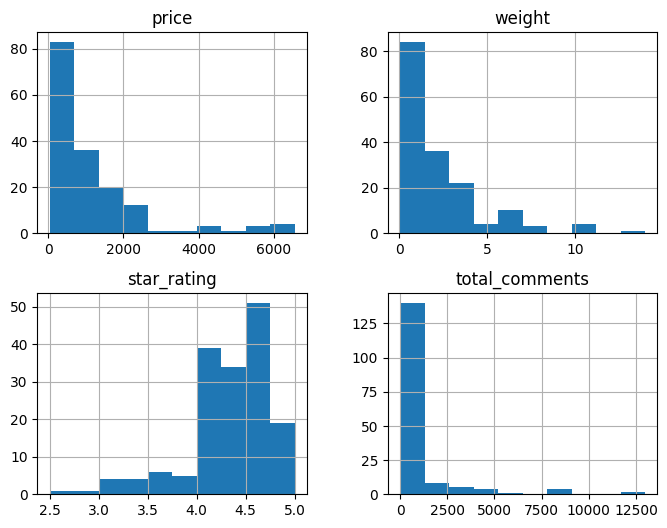

In [60]:
import matplotlib.pyplot as plt

# Step 1: Select the column you want to visualize
col = ['price', 'weight', 'star_rating', 'total_comments']

# Step 2: Plot histograms for each selected column
df[col].hist(figsize=(8, 6))
plt.show()

Here we create a histogram to visualise the average prices of 7 companies whose products have been bought at least 10 times.

<AxesSubplot: xlabel='company'>

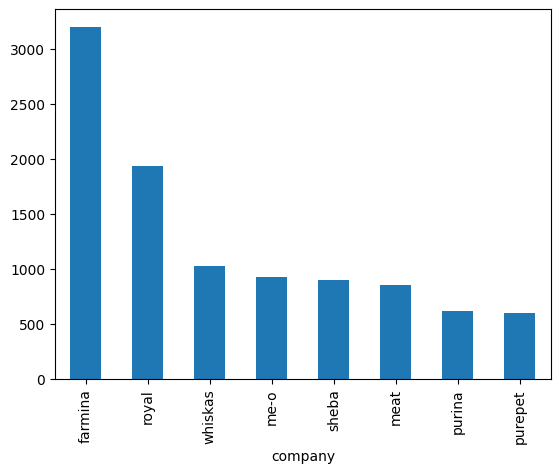

In [61]:
row = ['whiskas', 'farmina', 'me-o', 'royal', 'purepet', 'purina', 'meat', 'sheba']

# Group by values in one column and calculate the mean of another column
df[df.company.isin(row)].groupby('company')['price'].mean()\
.sort_values(ascending=False).plot(kind='bar')

Here we create a histogram to visualise the average number of comments for 7 companies whose products have been bought at least 10 times.

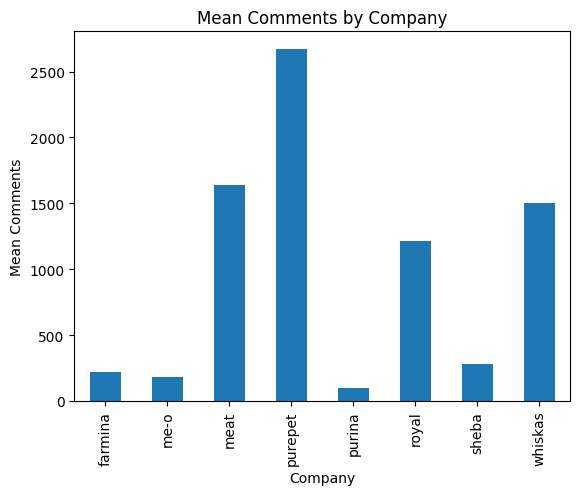

In [62]:
# Group by values in one column and calculate the mean of another column
mean_values = df[df.company.isin(row)].groupby('company')['total_comments'].mean()

# Plot the mean values
mean_values.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Mean Comments')
plt.title('Mean Comments by Company')
plt.show()

Here we look at the description of these products.

In [63]:
df[df.company.isin(row)].describe()

,price,weight,star_rating,total_comments,adult,chicken,wet,from_oceon,fish,tuna,salmon,mackerel,can,gravy,pouch,vegan
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1361.884298,2.498074,4.376860,988.165289,0.772727,0.297521,0.640496,0.61157,0.305785,0.256198,0.115702,0.132231,0.140496,0.181818,0.165289,0.140496
std,1461.554664,2.489964,0.326537,2270.421420,0.370810,0.459068,0.414443,0.48942,0.462655,0.438348,0.321198,0.340151,0.348946,0.387298,0.372986,0.348946
min,40.000000,0.070000,3.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,446.000000,1.020000,4.200000,23.000000,0.500000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,870.000000,1.500000,4.400000,178.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1850.000000,3.000000,4.500000,560.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6550.000000,10.000000,5.000000,12982.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To visualise the dependence between "weight" and "price" by "company", we use the Seaborn library. 

On the graph we can see that the prices by brand are in line with the packaging.

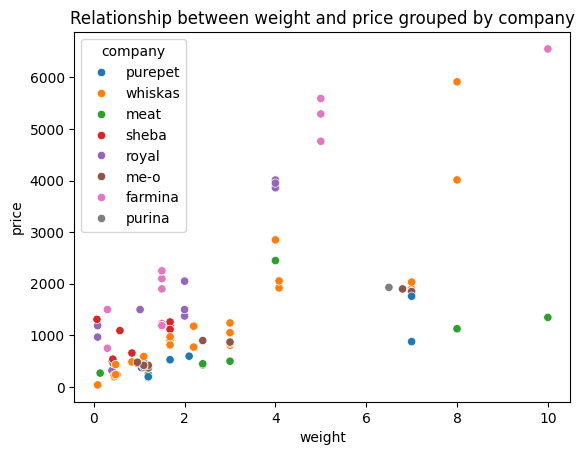

In [64]:
import seaborn as sns

# Plot the relationship between two variables grouped by a third variable
sns.scatterplot(data=df[df.company.isin(row)], x='weight', y='price', hue='company')
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Relationship between weight and price grouped by company')
plt.legend(title='company')
plt.show()

To create a correlation matrix and visualise it as a heatmap in Python, you can use the pandas library to compute the correlation matrix and the seaborn library to create the heatmap.     
We compute the correlation matrix using the corr() method provided by pandas DataFrame.
We use seaborn's heatmap() function to plot the heatmap. We pass the correlation matrix as data, set annot=True to display the correlation values on the heatmap, cmap='coolwarm' to specify the colour map.
Finally, we set the title of the plot with plt.title() and display the heatmap with plt.show().

This produces a heatmap visualisation of the correlation matrix, where the colours represent the strength and direction of the correlation between pairs of variables. Positive correlations are shown in warmer colours (reds), negative correlations in cooler colours (blues) and no correlation in white.

We can see that among the quantitative variables, price is most influenced by weight - the correlation coefficient reaches 70%.

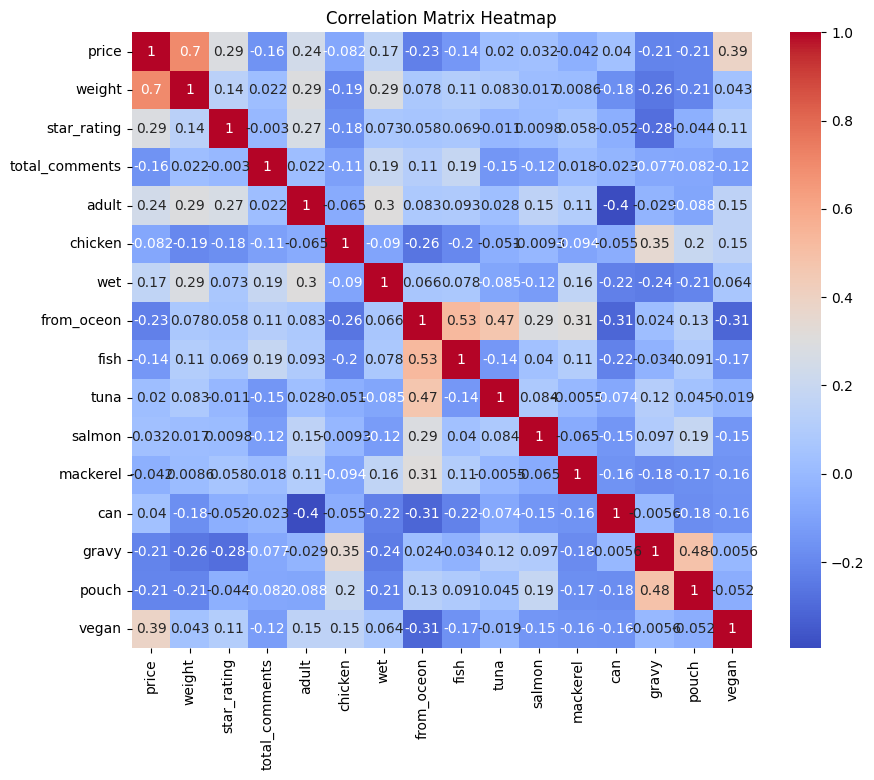

In [65]:
# Calculate the correlation matrix
correlation_matrix = df[df.company.isin(row)].corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

There is also a correlation between some ingredients (e.g. from_ocean, fish and tuna; or sauce and bag). When modelling, it's better to remove such features.

In [66]:
# Drop columns
df.drop(['fish','tuna','pouch'],axis='columns', inplace=True)
len(df.columns)

14

The to_csv(file_path) function stores the CSV file in a Pandas DataFrame named df. 

In [67]:
df.to_csv('output.csv', index=False)

In [68]:
!jupyter nbconvert 01_Data_pre-processing --to html


[NbConvertApp] Converting notebook 01_Data_pre-processing.ipynb to html
[NbConvertApp] Writing 984929 bytes to 01_Data_pre-processing.html
